In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data formatting
cps = pd.read_csv('CPS_data.csv')
cps = cps.rename(columns = {'A_M' : 'male_age', 'E_M' : 'male_edu',
                            'H_M' : 'male_workhours', 'W_M' : 'male_hourlywage',
                            'I_M' : 'male_weekly_nlincome',
                            'A_F' : 'female_age', 'E_F' : 'female_edu',
                            'H_F' : 'female_workhours', 'W_F' : 'female_hourlywage',
                            'I_F' : 'female_weekly_nlincome'})

cps = cps[(cps['male_workhours'] > 0) & (cps['female_workhours'] > 0)]

In [ ]:
# Lambdas when households are non-cooperative
cps['lambda_m_NC'] = (cps['male_hourlywage'] *  (112 - cps['male_workhours'])) / ((cps['male_hourlywage'] * 112 +
                                                                                   cps['female_hourlywage'] * cps['female_workhours'] +
                                                                                   cps['male_weekly_nlincome'] + cps['female_weekly_nlincome']))

cps['lambda_f_NC'] = (cps['female_hourlywage'] * (112 - cps['female_workhours'])) / ((cps['female_hourlywage'] * 112 +
                                                                                      cps['male_hourlywage'] * cps['male_workhours'] +
                                                                                      cps['male_weekly_nlincome'] + cps['female_weekly_nlincome']))

# Lambdas when households are cooperative (not multiplying by 2 for normalization to sum to 0)
cps['lambda_m_C'] =  (cps['male_hourlywage'] * (112 - cps['male_workhours'])) / ((cps['male_hourlywage'] + cps['female_hourlywage']) * 112 +
                                                                                  cps['male_weekly_nlincome'] + cps['female_weekly_nlincome'])

cps['lambda_f_C'] =  (cps['female_hourlywage'] * (112 - cps['female_workhours'])) / ((cps['male_hourlywage'] + cps['female_hourlywage']) * 112 +
                                                                                      cps['male_weekly_nlincome'] + cps['female_weekly_nlincome'])

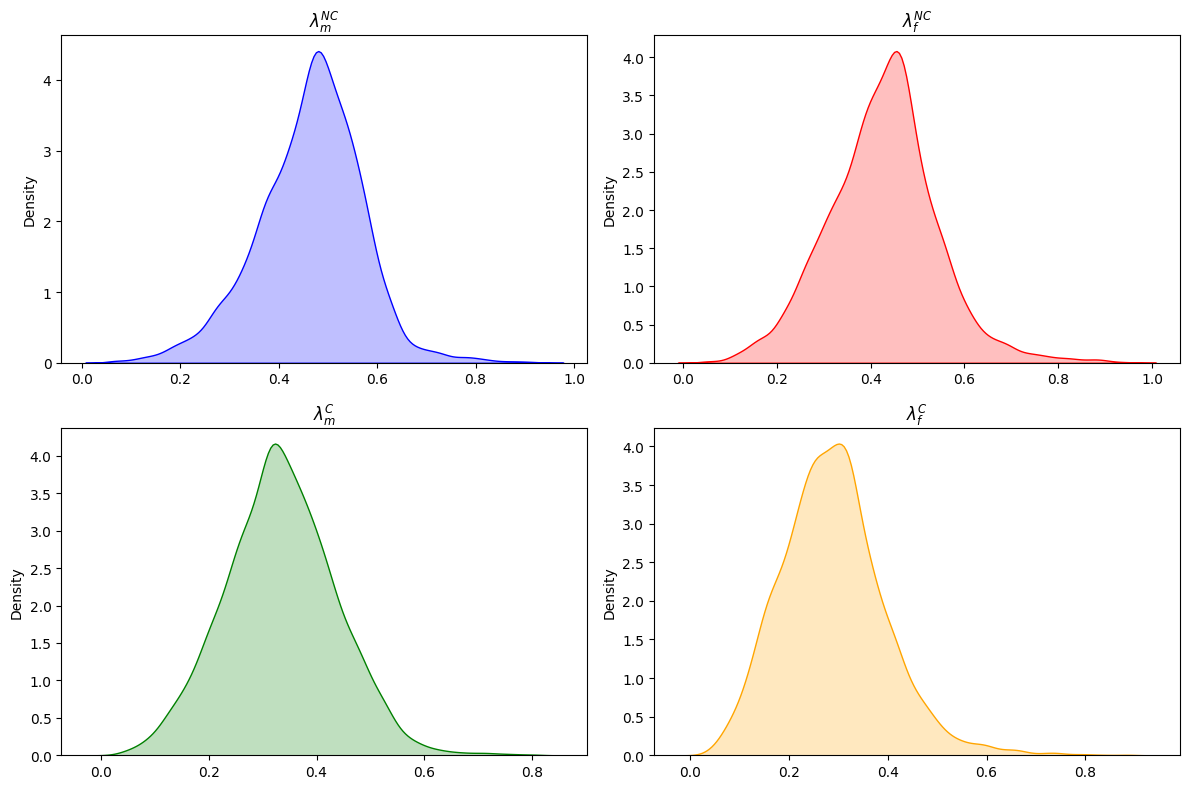

In [ ]:
# KDE plots
plt.figure(figsize = (12, 8))

# Plots for non-cooperation
plt.subplot(2, 2, 1)
sns.kdeplot(cps['lambda_m_NC'], fill = True, color = 'blue')
plt.title(r'$\lambda_m^{NC}$')
plt.xlabel('')

plt.subplot(2, 2, 2)
sns.kdeplot(cps['lambda_f_NC'], fill = True, color = 'red')
plt.title(r'$\lambda_f^{NC}$')
plt.xlabel('')

# Plots for cooperation
plt.subplot(2, 2, 3)
sns.kdeplot(cps['lambda_m_C'], fill = True, color = 'green')
plt.title(r'$\lambda_m^{C}$')
plt.xlabel('')

plt.subplot(2, 2, 4)
sns.kdeplot(cps['lambda_f_C'], fill = True, color = 'orange')
plt.title(r'$\lambda_f^{C}$')
plt.xlabel('')

plt.tight_layout()
plt.savefig('distributions.png', dpi = 600, bbox_inches = 'tight')
plt.show()

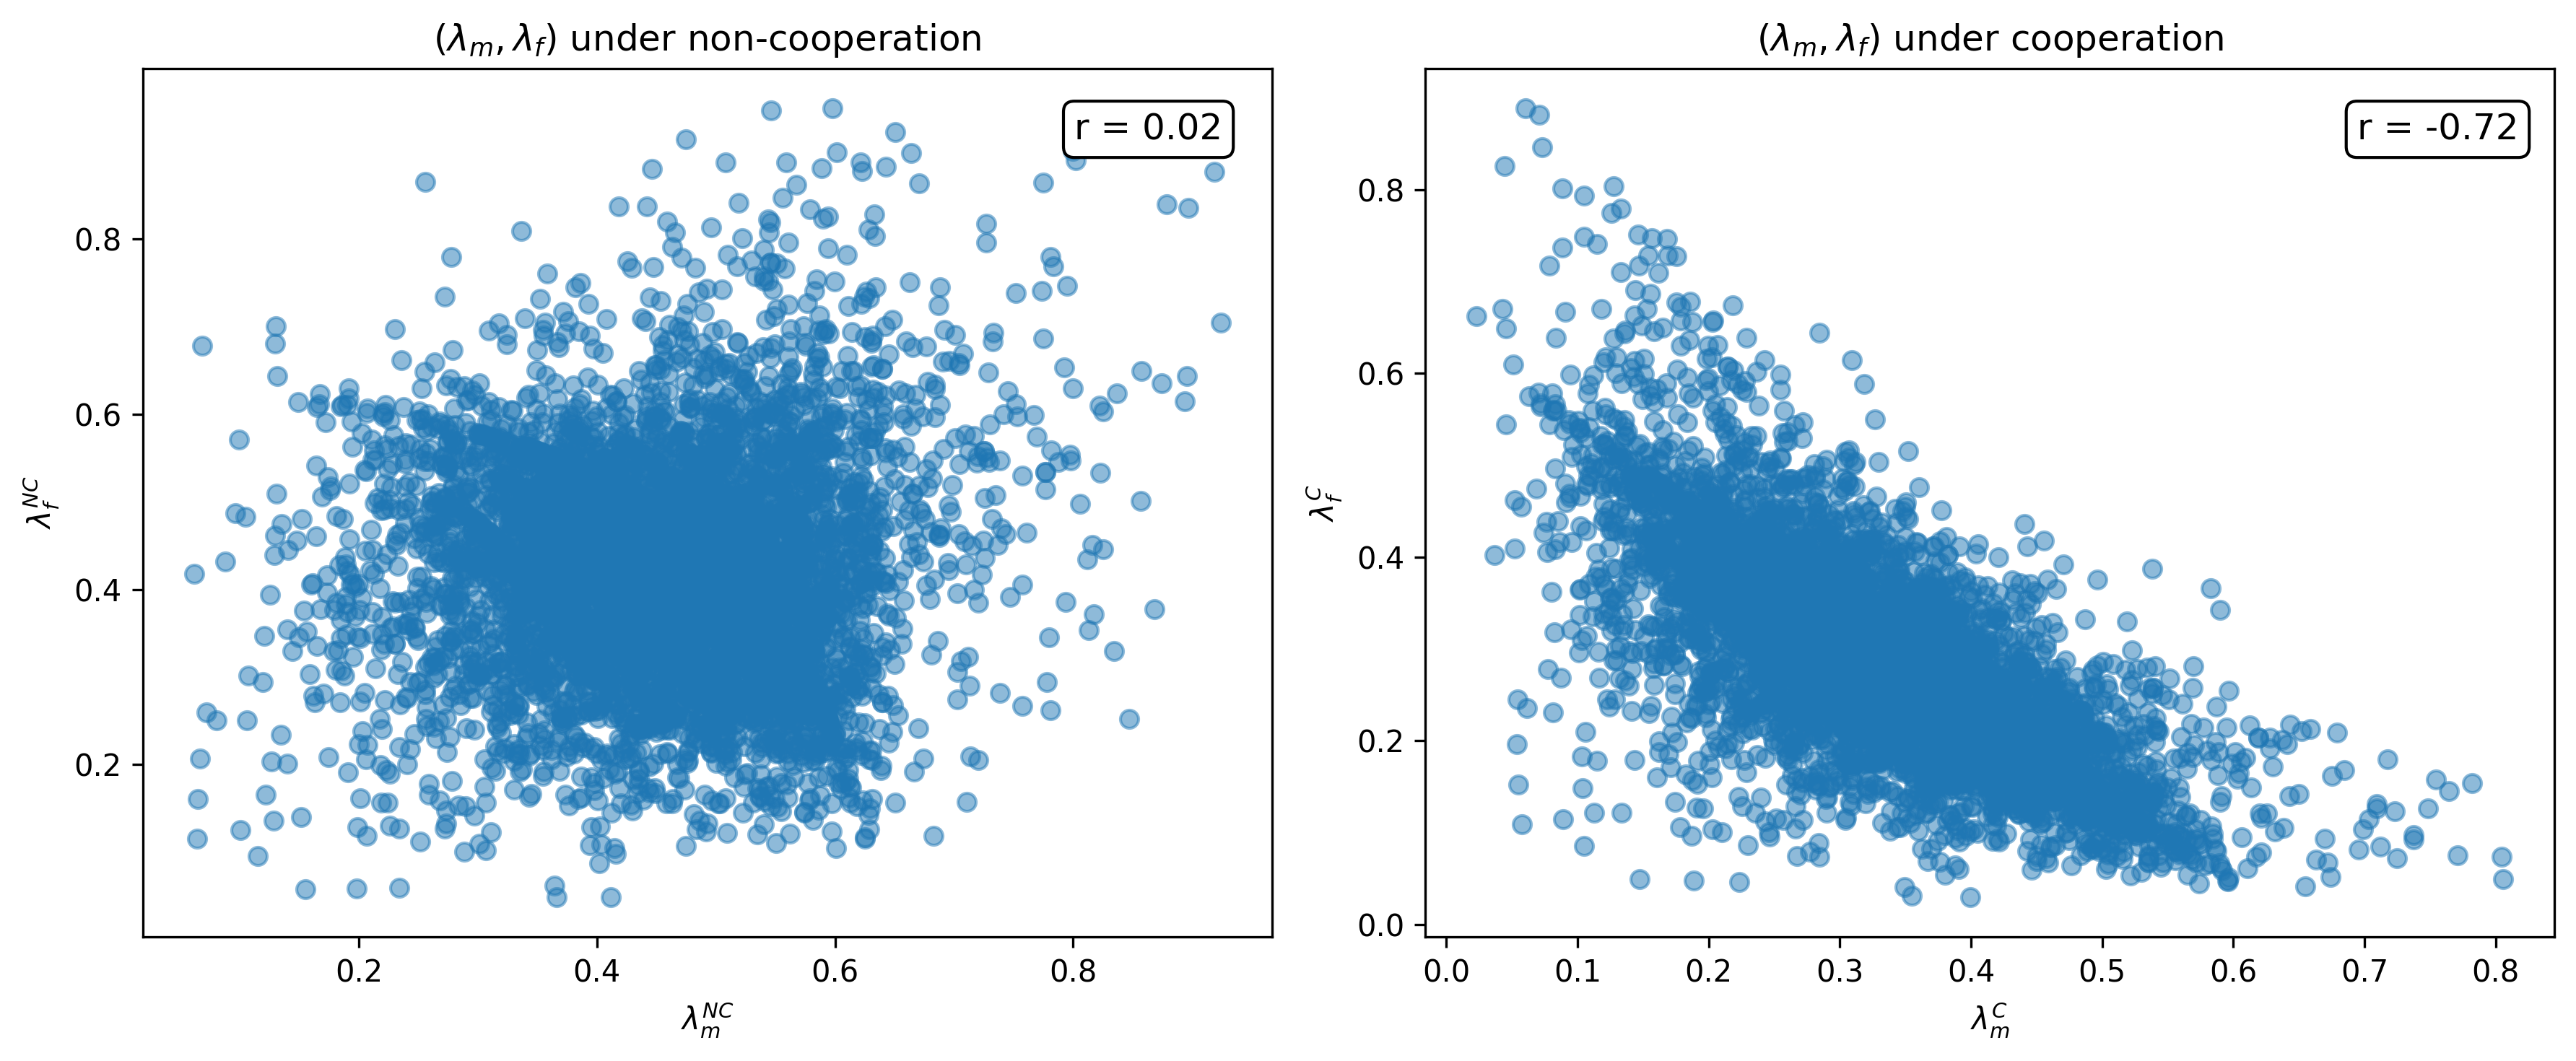

In [ ]:
# Scatterplots
fig, axes = plt.subplots(1, 2, figsize = (12, 5), dpi = 300)

# Correlation coefficients
corr_NC = np.corrcoef(cps['lambda_m_NC'], cps['lambda_f_NC'])[0, 1]
corr_C = np.corrcoef(cps['lambda_m_C'], cps['lambda_f_C'])[0, 1]

# Plot for non-cooperation
axes[0].scatter(cps['lambda_m_NC'], cps['lambda_f_NC'], alpha = 0.5)
axes[0].set_xlabel(r'$\lambda_m^{NC}$')
axes[0].set_ylabel(r'$\lambda_f^{NC}$')
axes[0].set_title(r'$(\lambda_m, \lambda_f)$ under non-cooperation')

axes[0].text(0.825, 0.95, f'r = {corr_NC:.2f}', transform = axes[0].transAxes, fontsize = 12,
             verticalalignment = 'top', bbox = dict(boxstyle = "round,pad=0.3",
                                                    edgecolor = "black", facecolor = "white"))

# Plot for cooperation
axes[1].scatter(cps['lambda_m_C'], cps['lambda_f_C'], alpha = 0.5)
axes[1].set_xlabel(r'$\lambda_m^{C}$')
axes[1].set_ylabel(r'$\lambda_f^{C}$')
axes[1].set_title(r'$(\lambda_m, \lambda_f)$ under cooperation')

axes[1].text(0.825, 0.95, f'r = {corr_C:.2f}', transform = axes[1].transAxes, fontsize = 12,
             verticalalignment = 'top', bbox = dict(boxstyle = "round,pad=0.3",
                                                    edgecolor = "black", facecolor = "white"))
plt.tight_layout()
plt.savefig('scatterplot_1.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
# Power law parameter calculation
n = len(cps)
for column in ['lambda_m_NC', 'lambda_f_NC', 'lambda_m_C', 'lambda_f_C']:
  nu_column = round(-n / sum(np.log(cps[column])), 3)
  print(f'Parameter for {column}: {nu_column}')

Parameter for lambda_m_NC: 1.248
Parameter for lambda_f_NC: 1.114
Parameter for lambda_m_C: 0.866
Parameter for lambda_f_C: 0.76


In [ ]:
def logL(column, estimated_parameter):
  n = len(cps[column])
  return (n * np.log(estimated_parameter)) + (estimated_parameter - 1) * sum(np.log(cps[column]), 3)

# Log likelihoods using the estimated parameters in the previous cell
print(logL('lambda_m_NC', 1.248))
print(logL('lambda_f_NC', 1.114))
print(logL('lambda_m_C', 0.866))
print(logL('lambda_f_C', 0.76))

155.9823797530894
38.80599391610849
73.20952089984485
280.56110423896143
